7) From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
District Name
Rural/Urban
Total Number of households
Total Number of Livable
Total Number of Dilapidated
Latrine_premise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv('Data/housing.csv',usecols=['State Name','District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise'])

#seperating urban and rural so that we can create a concatenated table for rural and urban only

In [3]:
housing.set_index(['Rural/Urban'],inplace=True)

In [4]:
rural=housing.loc['Rural'].copy()

In [5]:
urban=housing.loc['Urban'].copy()
urban.reset_index(drop=True, inplace=True)

In [6]:
rural.reset_index(drop=True, inplace=True)

In [7]:
combined=rural.merge(urban,how='inner',on="District Name",suffixes=('_rural','_urban'))

In [8]:
combined

,State Name_rural,District Name,Total Number of households_rural,Total Number of Livable_rural,Total Number of Dilapidated_rural,Latrine_premise_rural,State Name_urban,Total Number of households_urban,Total Number of Livable_urban,Total Number of Dilapidated_urban,Latrine_premise_urban
0,JAMMU & KASHMIR,Kupwara,100,58.1,8.3,48.9,JAMMU & KASHMIR,100,49.5,4.8,70.2
1,JAMMU & KASHMIR,Badgam,100,46.3,3.9,83.3,JAMMU & KASHMIR,100,33.8,2.6,90.4
2,JAMMU & KASHMIR,Leh(Ladakh),100,51.5,2.1,88.1,JAMMU & KASHMIR,100,54.6,1.1,95.8
3,JAMMU & KASHMIR,Kargil,100,73.3,3.5,96.8,JAMMU & KASHMIR,100,68.8,1.2,97.5
4,JAMMU & KASHMIR,Punch,100,59.5,2.4,13.7,JAMMU & KASHMIR,100,27.3,0.8,75.3
...,...,...,...,...,...,...,...,...,...,...,...
635,TAMIL NADU,Tiruppur,100,27.6,1.7,30.9,TAMIL NADU,100,23.6,0.7,75.0
636,PUDUCHERRY,Puducherry,100,31.9,2.6,35.8,PUDUCHERRY,100,19.0,1.2,82.5
637,PUDUCHERRY,Karaikal,100,36.8,2.1,47.6,PUDUCHERRY,100,21.0,1.2,74.4
638,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,100,44.3,2.7,48.0,ANDAMAN & NICOBAR ISLANDS,100,55.9,6.6,56.1


In [9]:
combined.columns=['State/UT_rural','District','Households_Rural','Households_Rural_Livable','Households_Rural_Dilapidated','Households_Rural_Toilet_Premise','State/UT_urban','Households_Urban','Households_Urban_Livable','Households_Urban_Dilapidated','Households_Urban_Toilet_Premise']

In [10]:
combined['State/UT_rural']=combined['State/UT_rural'].str.title()

In [11]:
combined['State/UT_urban']=combined['State/UT_urban'].str.title()

In [12]:
combined.drop('State/UT_urban',axis=1,inplace=True)

In [13]:
combined

,State/UT_rural,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Jammu & Kashmir,Kupwara,100,58.1,8.3,48.9,100,49.5,4.8,70.2
1,Jammu & Kashmir,Badgam,100,46.3,3.9,83.3,100,33.8,2.6,90.4
2,Jammu & Kashmir,Leh(Ladakh),100,51.5,2.1,88.1,100,54.6,1.1,95.8
3,Jammu & Kashmir,Kargil,100,73.3,3.5,96.8,100,68.8,1.2,97.5
4,Jammu & Kashmir,Punch,100,59.5,2.4,13.7,100,27.3,0.8,75.3
...,...,...,...,...,...,...,...,...,...,...
635,Tamil Nadu,Tiruppur,100,27.6,1.7,30.9,100,23.6,0.7,75.0
636,Puducherry,Puducherry,100,31.9,2.6,35.8,100,19.0,1.2,82.5
637,Puducherry,Karaikal,100,36.8,2.1,47.6,100,21.0,1.2,74.4
638,Andaman & Nicobar Islands,North & Middle Andaman,100,44.3,2.7,48.0,100,55.9,6.6,56.1


In [14]:
combined.columns=['State/UT','District','Households_Rural','Households_Rural_Livable','Households_Rural_Dilapidated','Households_Rural_Toilet_Premise','Households_Urban','Households_Urban_Livable','Households_Urban_Dilapidated','Households_Urban_Toilet_Premise']

In [15]:
combined['State/UT']=combined['State/UT'].str.replace("&","and")

now read the census cleaned data from pb7

In [16]:
housing=pd.read_csv('Data/census_clean.csv',usecols=['Households_Rural','Households_Urban','Households','District','State/UT'])

In [17]:
housing.head()

,State/UT,District,Households_Rural,Households_Urban,Households
0,Jammu and Kashmir,Kupwara,158438.0,23226.0,181664.0
1,Jammu and Kashmir,Badgam,160649.0,27190.0,187839.0
2,Laddakh,Leh(Ladakh),36920.0,17474.0,54394.0
3,Laddakh,Kargil,40370.0,7774.0,48144.0
4,Jammu and Kashmir,Punch,132139.0,15269.0,147408.0


In [18]:
housing['Households_Rural_Livable']=housing['Households_Rural']*(combined['Households_Rural_Livable']/100)

In [19]:
housing['Households_Rural_Dilapidated']=housing['Households_Rural']*(combined['Households_Rural_Dilapidated']/100)

In [20]:
housing['Households_Rural_Toilet_Premise']=housing['Households_Rural']*(combined['Households_Rural_Toilet_Premise']/100)

In [21]:
housing['Households_Urban_Livable']=housing['Households_Urban']*(combined['Households_Urban_Livable']/100)

In [22]:
housing['Households_Urban_Dilapidated']=housing['Households_Urban']*(combined['Households_Urban_Dilapidated']/100)

In [23]:
housing['Households_Urban_Toilet_Premise']=housing['Households_Urban']*(combined['Households_Urban_Toilet_Premise']/100)

In [24]:
housing

,State/UT,District,Households_Rural,Households_Urban,Households,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Jammu and Kashmir,Kupwara,158438.0,23226.0,181664.0,92052.478,13150.354,77476.182,11496.870,1114.848,16304.652
1,Jammu and Kashmir,Badgam,160649.0,27190.0,187839.0,74380.487,6265.311,133820.617,9190.220,706.940,24579.760
2,Laddakh,Leh(Ladakh),36920.0,17474.0,54394.0,19013.800,775.320,32526.520,9540.804,192.214,16740.092
3,Laddakh,Kargil,40370.0,7774.0,48144.0,29591.210,1412.950,39078.160,5348.512,93.288,7579.650
4,Jammu and Kashmir,Punch,132139.0,15269.0,147408.0,78622.705,3171.336,18103.043,4168.437,122.152,11497.557
...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,0.0,12110.0,12110.0,0.000,0.000,0.000,2857.960,84.770,9082.500
636,Pondicherry,Karaikal,35618.0,33715.0,69333.0,11362.142,926.068,12751.244,6405.850,404.580,27814.875
637,Andaman and Nicobar Islands,Nicobars,15958.0,0.0,15958.0,5872.544,335.118,7596.008,0.000,0.000,0.000
638,Andaman and Nicobar Islands,North AND Middle Andaman,39091.0,1094.0,40185.0,17317.313,1055.457,18763.680,611.546,72.204,613.734


In [25]:
housing = housing.reindex(sorted(housing.columns), axis=1)

In [26]:
#housing.drop('Households',axis=1,inplace=True)

In [27]:
housing

,District,Households,Households_Rural,Households_Rural_Dilapidated,Households_Rural_Livable,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Dilapidated,Households_Urban_Livable,Households_Urban_Toilet_Premise,State/UT
0,Kupwara,181664.0,158438.0,13150.354,92052.478,77476.182,23226.0,1114.848,11496.870,16304.652,Jammu and Kashmir
1,Badgam,187839.0,160649.0,6265.311,74380.487,133820.617,27190.0,706.940,9190.220,24579.760,Jammu and Kashmir
2,Leh(Ladakh),54394.0,36920.0,775.320,19013.800,32526.520,17474.0,192.214,9540.804,16740.092,Laddakh
3,Kargil,48144.0,40370.0,1412.950,29591.210,39078.160,7774.0,93.288,5348.512,7579.650,Laddakh
4,Punch,147408.0,132139.0,3171.336,78622.705,18103.043,15269.0,122.152,4168.437,11497.557,Jammu and Kashmir
...,...,...,...,...,...,...,...,...,...,...,...
635,Mahe,12110.0,0.0,0.000,0.000,0.000,12110.0,84.770,2857.960,9082.500,Pondicherry
636,Karaikal,69333.0,35618.0,926.068,11362.142,12751.244,33715.0,404.580,6405.850,27814.875,Pondicherry
637,Nicobars,15958.0,15958.0,335.118,5872.544,7596.008,0.0,0.000,0.000,0.000,Andaman and Nicobar Islands
638,North AND Middle Andaman,40185.0,39091.0,1055.457,17317.313,18763.680,1094.0,72.204,611.546,613.734,Andaman and Nicobar Islands


Convert it into csv

In [28]:
housing.to_csv('clean_Data/Clean_Data/housing_cleanwithStates.csv', index=False)

Now we have to find the columns that are missing in both census and housing

In [29]:
housing

,District,Households,Households_Rural,Households_Rural_Dilapidated,Households_Rural_Livable,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Dilapidated,Households_Urban_Livable,Households_Urban_Toilet_Premise,State/UT
0,Kupwara,181664.0,158438.0,13150.354,92052.478,77476.182,23226.0,1114.848,11496.870,16304.652,Jammu and Kashmir
1,Badgam,187839.0,160649.0,6265.311,74380.487,133820.617,27190.0,706.940,9190.220,24579.760,Jammu and Kashmir
2,Leh(Ladakh),54394.0,36920.0,775.320,19013.800,32526.520,17474.0,192.214,9540.804,16740.092,Laddakh
3,Kargil,48144.0,40370.0,1412.950,29591.210,39078.160,7774.0,93.288,5348.512,7579.650,Laddakh
4,Punch,147408.0,132139.0,3171.336,78622.705,18103.043,15269.0,122.152,4168.437,11497.557,Jammu and Kashmir
...,...,...,...,...,...,...,...,...,...,...,...
635,Mahe,12110.0,0.0,0.000,0.000,0.000,12110.0,84.770,2857.960,9082.500,Pondicherry
636,Karaikal,69333.0,35618.0,926.068,11362.142,12751.244,33715.0,404.580,6405.850,27814.875,Pondicherry
637,Nicobars,15958.0,15958.0,335.118,5872.544,7596.008,0.0,0.000,0.000,0.000,Andaman and Nicobar Islands
638,North AND Middle Andaman,40185.0,39091.0,1055.457,17317.313,18763.680,1094.0,72.204,611.546,613.734,Andaman and Nicobar Islands


In [30]:
districts=combined['District'].tolist()

In [31]:
unmatched=housing[~housing['District'].isin(districts)]['District']

In [32]:
unmatched

24               Lahul AND Spiti
33                       Kinnaur
93                     New Delhi
94                       Central
341                      Kolkata
495       Dadra AND Nagar Haveli
517              Mumbai Suburban
518                       Mumbai
535                    Hyderabad
586                  Lakshadweep
602                      Chennai
633                        Yanam
634                  PONDICHERRY
635                         Mahe
637                     Nicobars
638    North  AND Middle Andaman
Name: District, dtype: object

In [33]:
census=pd.read_csv('clean_Data/census_clean.csv')

In [34]:
districts=census['District'].tolist()

In [35]:
housing['District']=housing['District'].str.title()

In [36]:
def func(word):
    word=word.title()
    word=word.replace(' And ',' and ')
    return word

In [37]:
housing['District']=housing['District'].apply(func)

In [38]:
unmatched=housing[~housing['District'].isin(districts)]['District']

In [39]:
unmatched

24               Lahul and Spiti
495       Dadra and Nagar Haveli
634                  Pondicherry
638    North  and Middle Andaman
Name: District, dtype: object

Problem Statement 8: (Visualise the housing data)


Visualize the following data for each state using appropriate methods:
Number of households for 100 people
Percentage of households that have toilet(s) in premise to the total number of households.
Urban to rural population ratio.


In [40]:
a=housing["Households_Rural_Toilet_Premise"].sum()+housing["Households_Urban_Toilet_Premise"].sum()

In [41]:
b=housing["Households_Rural"].sum()+housing["Households_Urban"].sum()

In [42]:
a

156642353.56165802

In [43]:
b

330951688.6084

In [44]:
(a/b)*100

47.330882105576976

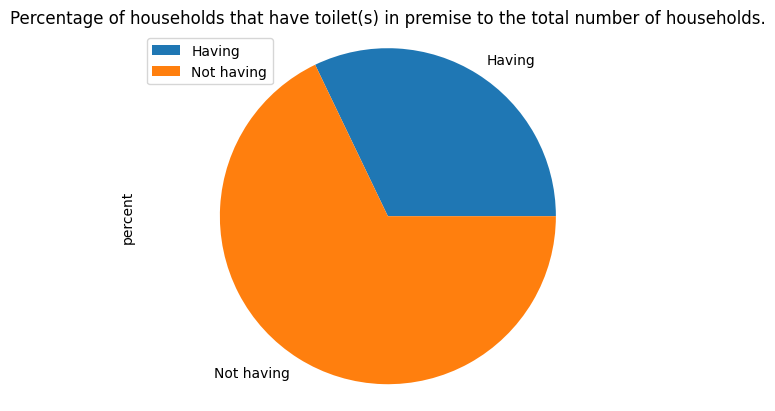

In [45]:
data7 = {'value': [a,b]}
chart = pd.DataFrame(data7, index=['Having', 'Not having'])

# Calculate the percentage of each value
total = chart['value'].sum()
chart['percent'] = chart['value'] / total * 100

# Create a pie chart of the percentages
chart['percent'].plot.pie()
plt.axis('equal')
plt.legend(labels=chart.index, loc='upper left')
plt.title('Percentage of households that have toilet(s) in premise to the total number of households.')
plt.show()

In [46]:
df_population = housing[['Households_Urban', 'Households_Rural']]

Text(0.5, 1.0, 'Comparison of Urban and Rural Populations')

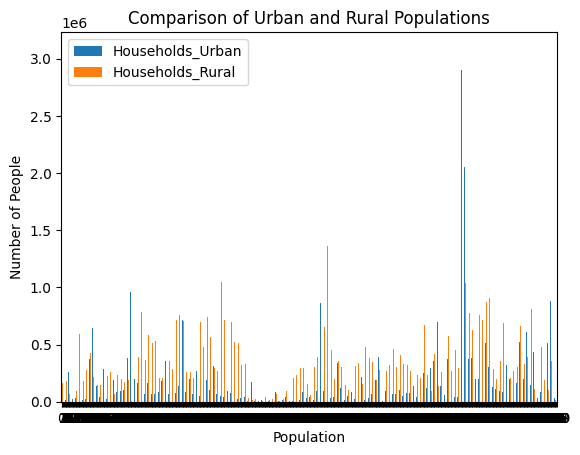

In [47]:
ax = df_population.plot.bar(rot=0)
ax.set_xlabel('Population')
ax.set_ylabel('Number of People')
ax.set_title('Comparison of Urban and Rural Populations')